In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from statsmodels.tsa.api import SimpleExpSmoothing, ExponentialSmoothing, Holt
import warnings

warnings.filterwarnings("ignore")

In [131]:
df=pd.read_csv(r"E:\DS Course\Sparkling.csv",parse_dates=True)
df.head()

,YearMonth,Sparkling
0,1980-01,1686
1,1980-02,1591
2,1980-03,2304
3,1980-04,1712
4,1980-05,1471


In [3]:
df.duplicated().sum()

0

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   YearMonth  187 non-null    object
 1   Sparkling  187 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.1+ KB


In [5]:
df.shape

(187, 2)

In [6]:
df_copy=df.copy()

In [7]:
date=pd.date_range(start="1980-01-01",freq="MS",periods=len(df))
date

DatetimeIndex(['1980-01-01', '1980-02-01', '1980-03-01', '1980-04-01',
               '1980-05-01', '1980-06-01', '1980-07-01', '1980-08-01',
               '1980-09-01', '1980-10-01',
               ...
               '1994-10-01', '1994-11-01', '1994-12-01', '1995-01-01',
               '1995-02-01', '1995-03-01', '1995-04-01', '1995-05-01',
               '1995-06-01', '1995-07-01'],
              dtype='datetime64[ns]', length=187, freq='MS')

In [8]:
df_copy.set_index(date, inplace=True)
df_copy.head()

,YearMonth,Sparkling
1980-01-01,1980-01,1686
1980-02-01,1980-02,1591
1980-03-01,1980-03,2304
1980-04-01,1980-04,1712
1980-05-01,1980-05,1471


In [9]:
df_copy.describe()

,Sparkling
count,187.000000
mean,2402.417112
std,1295.111540
min,1070.000000
25%,1605.000000
50%,1874.000000
75%,2549.000000
max,7242.000000


In [10]:
df_copy.drop("YearMonth", axis=1, inplace=True)

Text(0, 0.5, 'Sales of Sparkling Wine')

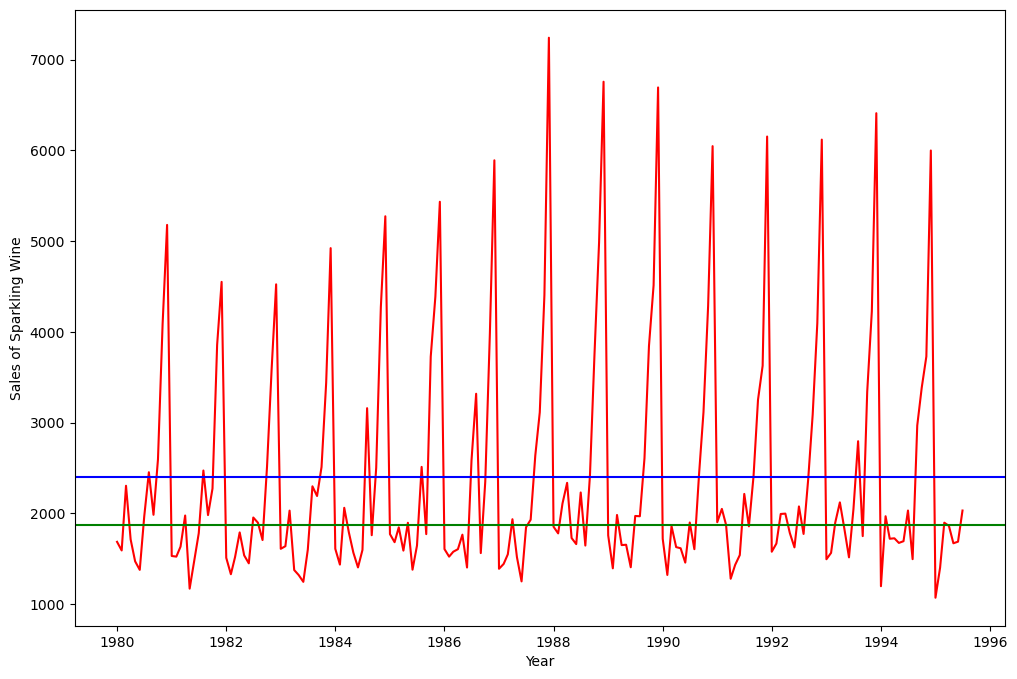

In [11]:
plt.figure(figsize=(12,8))
plt.plot(df_copy["Sparkling"], color="Red")
plt.axhline(df_copy["Sparkling"].mean(), color="Blue")
plt.axhline(df_copy["Sparkling"].median(), color="Green")
plt.xlabel("Year")
plt.ylabel("Sales of Sparkling Wine")

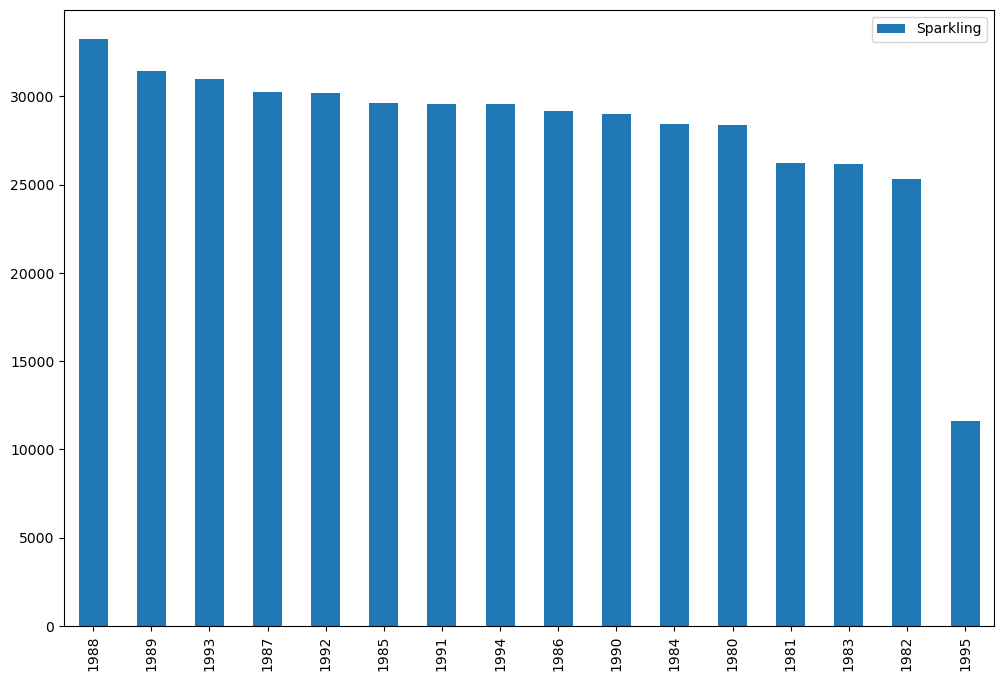

In [12]:
plt.figure(figsize=(12,8))
df_copy.groupby(df_copy.index.year)["Sparkling"].sum().sort_values(ascending=False).plot(kind="bar")
plt.legend(loc="best")

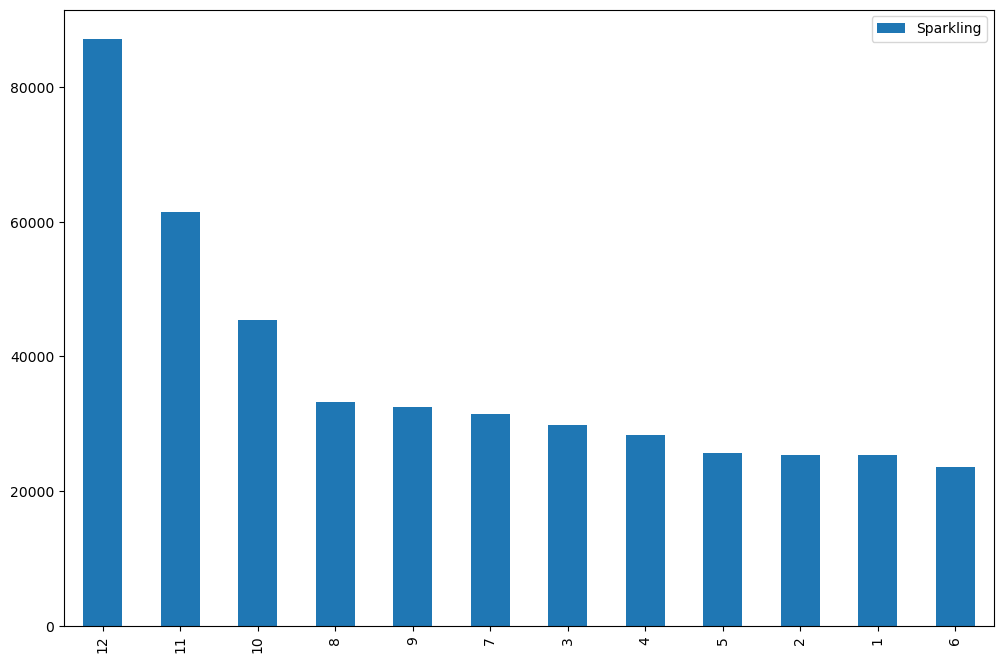

In [13]:
plt.figure(figsize=(12,8))
df_copy.groupby(df_copy.index.month)["Sparkling"].sum().sort_values(ascending=False).plot(kind="bar")
plt.legend(loc="best")

Text(0.5, 0, 'Year')

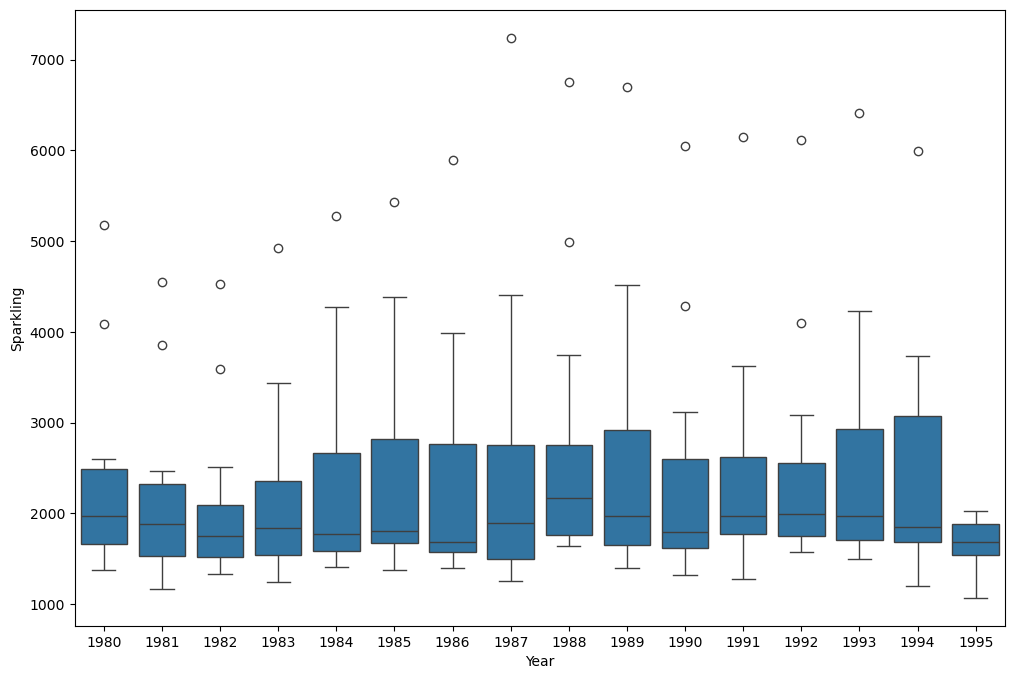

In [14]:
plt.figure(figsize=(12,8))
sns.boxplot(x=df_copy.index.year, y= df_copy["Sparkling"])
plt.xlabel("Year")

Text(0.5, 0, 'Month')

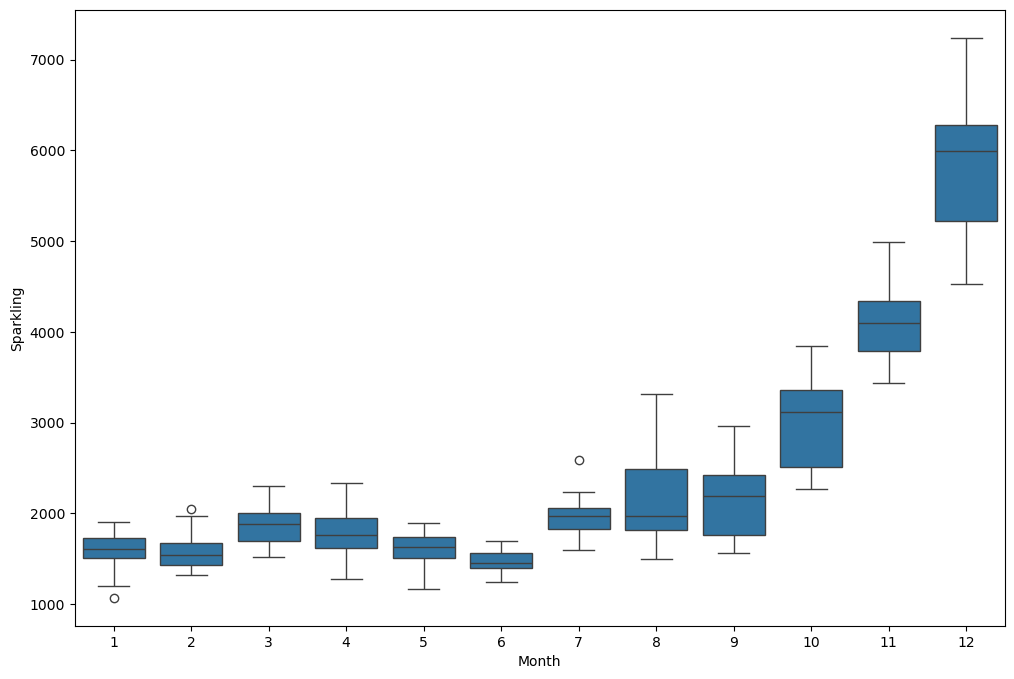

In [15]:
plt.figure(figsize=(12,8))
sns.boxplot(x=df_copy.index.month, y= df_copy["Sparkling"])
plt.xlabel("Month")

In [16]:
import calendar
df_copy['Month'] = df_copy.index.month
df_copy['Month'] = df_copy['Month'].apply(lambda x: calendar.month_abbr[x]) #spltting into english month names 
df_copy['Year'] = df_copy.index.year

In [17]:
df_copy_pivot=pd.pivot_table(df_copy, columns= "Year", index="Month")
df_copy_pivot=df_copy_pivot.reindex(index = ['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
df_copy_pivot

Sparkling                                                          \
Year       1980    1981    1982    1983    1984    1985    1986    1987   
Month                                                                     
Jan      1686.0  1530.0  1510.0  1609.0  1609.0  1771.0  1606.0  1389.0   
Feb      1591.0  1523.0  1329.0  1638.0  1435.0  1682.0  1523.0  1442.0   
Mar      2304.0  1633.0  1518.0  2030.0  2061.0  1846.0  1577.0  1548.0   
Apr      1712.0  1976.0  1790.0  1375.0  1789.0  1589.0  1605.0  1935.0   
May      1471.0  1170.0  1537.0  1320.0  1567.0  1896.0  1765.0  1518.0   
Jun      1377.0  1480.0  1449.0  1245.0  1404.0  1379.0  1403.0  1250.0   
Jul      1966.0  1781.0  1954.0  1600.0  1597.0  1645.0  2584.0  1847.0   
Aug      2453.0  2472.0  1897.0  2298.0  3159.0  2512.0  3318.0  1930.0   
Sep      1984.0  1981.0  1706.0  2191.0  1759.0  1771.0  1562.0  2638.0   
Oct      2596.0  2273.0  2514.0  2511.0  2504.0  3727.0  2349.0  3114.0   
Nov      4087.0  3857.0  3593.0  3440.0  4273.0  4388.0  3987.0  4405.0   
Dec      5179.0  4551.0  4524.0  4923.0  5274.0  5434.0  5891.0  7242.0   

                                                                       
Year     1988    1989    1990    1991    1992    1993    1994    1995  
Month                                                                  
Jan    1853.0  1757.0  1720.0  1902.0  1577.0  1494.0  1197.0  1070.0  
Feb    1779.0  1394.0  1321.0  2049.0  1667.0  1564.0  1968.0  1402.0  
Mar    2108.0  1982.0  1859.0  1874.0  1993.0  1898.0  1720.0  1897.0  
Apr    2336.0  1650.0  1628.0  1279.0  1997.0  2121.0  1725.0  1862.0  
May    1728.0  1654.0  1615.0  1432.0  1783.0  1831.0  1674.0  1670.0  
Jun    1661.0  1406.0  1457.0  1540.0  1625.0  1515.0  1693.0  1688.0  
Jul    2230.0  1971.0  1899.0  2214.0  2076.0  2048.0  2031.0  2031.0  
Aug    1645.0  1968.0  1605.0  1857.0  1773.0  2795.0  1495.0     NaN  
Sep    2421.0  2608.0  2424.0  2408.0  2377.0  1749.0  2968.0     NaN  
Oct    3740.0  3845.0  3116.0  3252.0  3088.0  3339.0  3385.0     NaN  
Nov    4988.0  4514.0  4286.0  3627.0  4096.0  4227.0  3729.0     NaN  
Dec    6757.0  6694.0  6047.0  6153.0  6119.0  6410.0  5999.0     NaN

<Axes: xlabel='Month'>

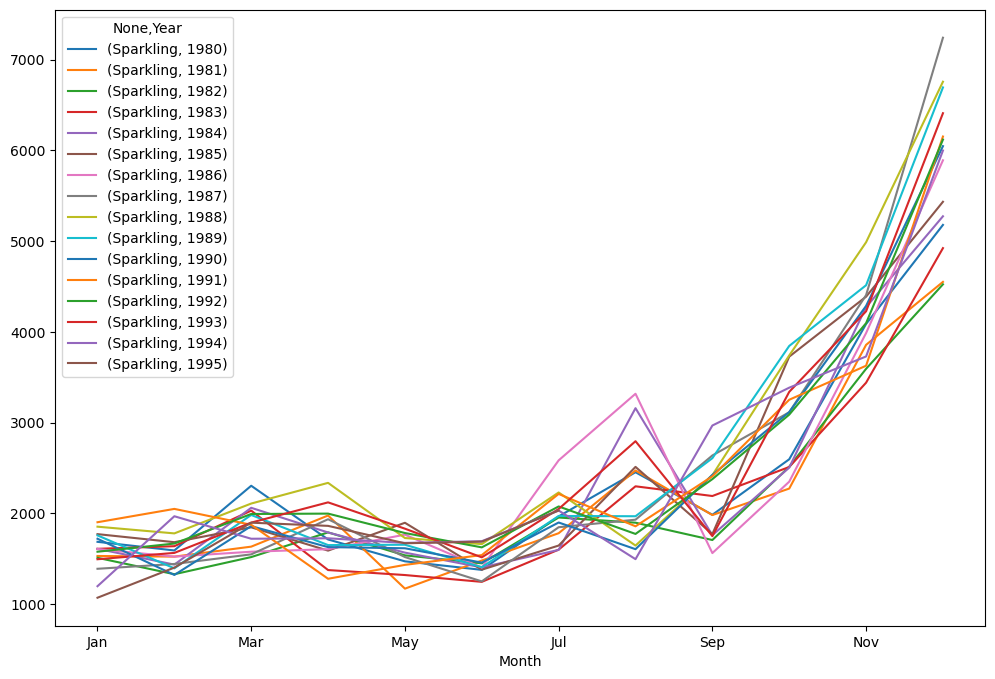

In [18]:
df_copy_pivot.plot(figsize=(12,8))

In [19]:
df_copy_pivot_year=pd.pivot_table(df_copy, columns= "Month", index="Year")
df_copy_pivot_year

Sparkling                                                          \
Month       Apr     Aug     Dec     Feb     Jan     Jul     Jun     Mar   
Year                                                                      
1980     1712.0  2453.0  5179.0  1591.0  1686.0  1966.0  1377.0  2304.0   
1981     1976.0  2472.0  4551.0  1523.0  1530.0  1781.0  1480.0  1633.0   
1982     1790.0  1897.0  4524.0  1329.0  1510.0  1954.0  1449.0  1518.0   
1983     1375.0  2298.0  4923.0  1638.0  1609.0  1600.0  1245.0  2030.0   
1984     1789.0  3159.0  5274.0  1435.0  1609.0  1597.0  1404.0  2061.0   
1985     1589.0  2512.0  5434.0  1682.0  1771.0  1645.0  1379.0  1846.0   
1986     1605.0  3318.0  5891.0  1523.0  1606.0  2584.0  1403.0  1577.0   
1987     1935.0  1930.0  7242.0  1442.0  1389.0  1847.0  1250.0  1548.0   
1988     2336.0  1645.0  6757.0  1779.0  1853.0  2230.0  1661.0  2108.0   
1989     1650.0  1968.0  6694.0  1394.0  1757.0  1971.0  1406.0  1982.0   
1990     1628.0  1605.0  6047.0  1321.0  1720.0  1899.0  1457.0  1859.0   
1991     1279.0  1857.0  6153.0  2049.0  1902.0  2214.0  1540.0  1874.0   
1992     1997.0  1773.0  6119.0  1667.0  1577.0  2076.0  1625.0  1993.0   
1993     2121.0  2795.0  6410.0  1564.0  1494.0  2048.0  1515.0  1898.0   
1994     1725.0  1495.0  5999.0  1968.0  1197.0  2031.0  1693.0  1720.0   
1995     1862.0     NaN     NaN  1402.0  1070.0  2031.0  1688.0  1897.0   

                                       
Month     May     Nov     Oct     Sep  
Year                                   
1980   1471.0  4087.0  2596.0  1984.0  
1981   1170.0  3857.0  2273.0  1981.0  
1982   1537.0  3593.0  2514.0  1706.0  
1983   1320.0  3440.0  2511.0  2191.0  
1984   1567.0  4273.0  2504.0  1759.0  
1985   1896.0  4388.0  3727.0  1771.0  
1986   1765.0  3987.0  2349.0  1562.0  
1987   1518.0  4405.0  3114.0  2638.0  
1988   1728.0  4988.0  3740.0  2421.0  
1989   1654.0  4514.0  3845.0  2608.0  
1990   1615.0  4286.0  3116.0  2424.0  
1991   1432.0  3627.0  3252.0  2408.0  
1992   1783.0  4096.0  3088.0  2377.0  
1993   1831.0  4227.0  3339.0  1749.0  
1994   1674.0  3729.0  3385.0  2968.0  
1995   1670.0     NaN     NaN     NaN

<Axes: xlabel='Year'>

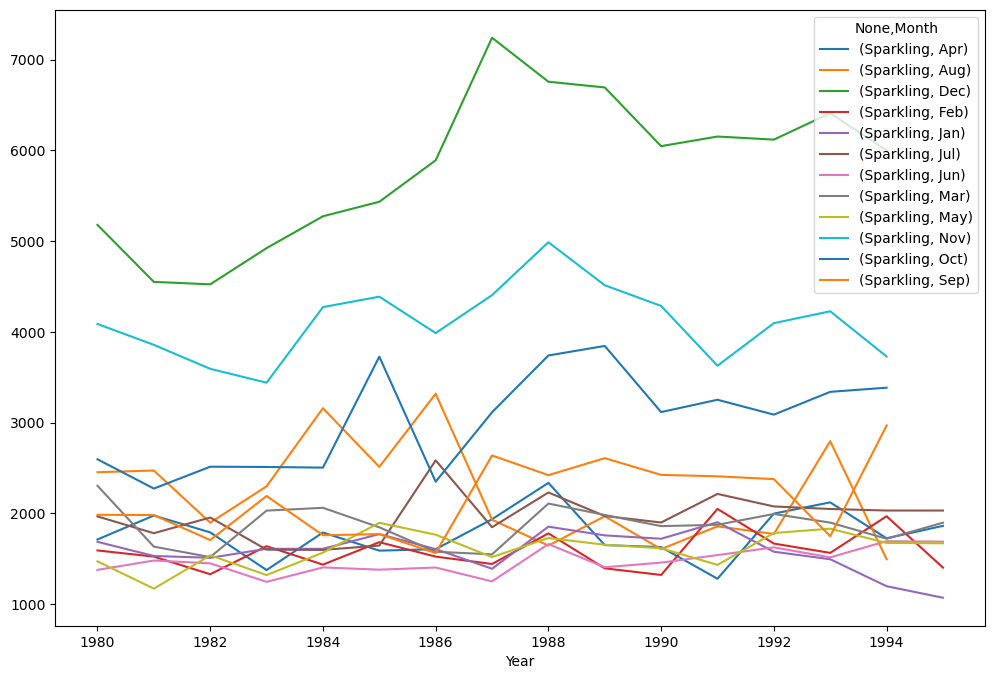

In [20]:
df_copy_pivot_year.plot(figsize=(12,8))

Decompose the sales pattern to check the trend, seasonality and residual

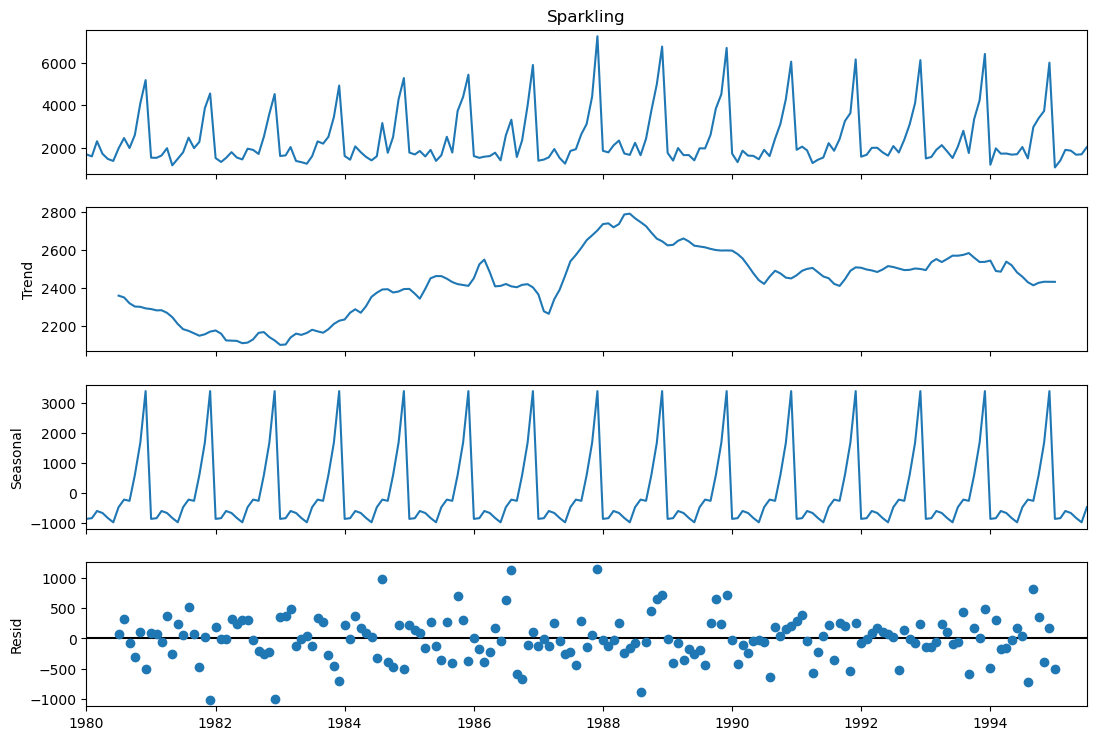

In [133]:
decompose=sm.tsa.seasonal_decompose(df_copy["Sparkling"], model="additive")
fig=decompose.plot()
fig.set_figwidth(12)
fig.set_figheight(8)

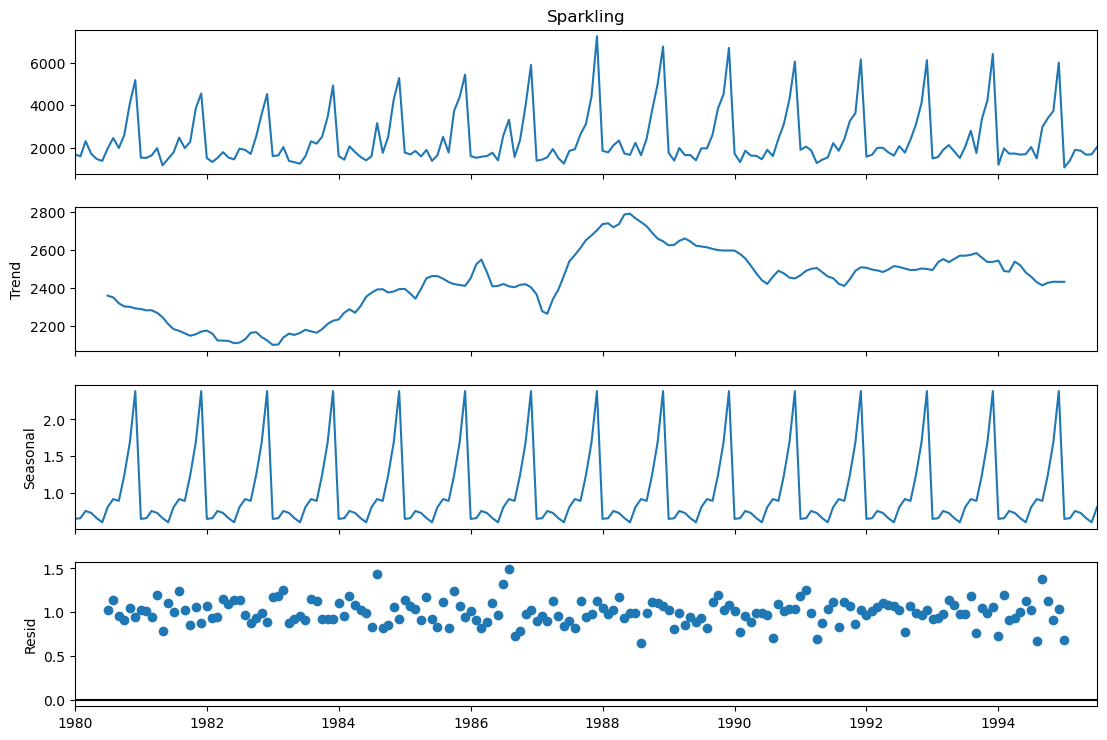

In [135]:
decompose=sm.tsa.seasonal_decompose(df_copy["Sparkling"], model="multiplicative")
fig=decompose.plot()
fig.set_figwidth(12)
fig.set_figheight(8)

In [23]:
train = df_copy.iloc[0:int(len(df_copy) * 0.8)]
test = df_copy.iloc[int(len(df_copy) * 0.8):]

In [24]:
train.shape

(149, 3)

In [25]:
test.shape

(38, 3)

Linear Regression Model

In [27]:
train_time= [i+1 for i in range(len(train))]
test_time=[i+150 for i in range(len(test))]

In [28]:
LinearRegressionTrain=train.copy()
LinearRegressionTest=test.copy()

In [29]:
LinearRegressionTrain["time"]=train_time
LinearRegressionTest["time"]=test_time

In [30]:
lr=LinearRegression()
lr.fit(LinearRegressionTrain[["time"]],LinearRegressionTrain["Sparkling"])

LinearRegression()

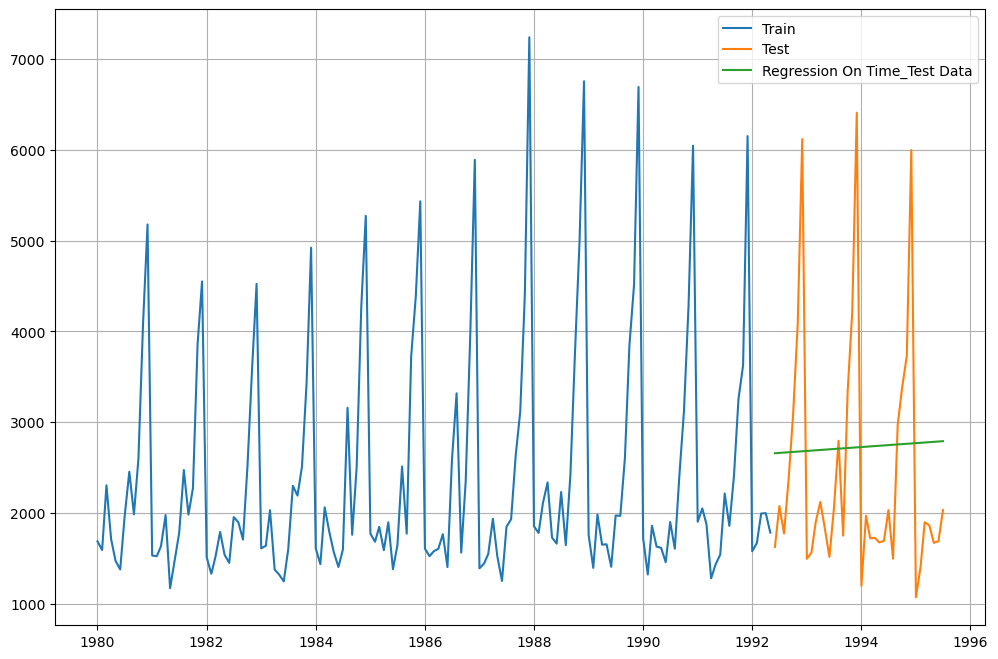

In [31]:
LinearRegressionTest['Predicted_Sales'] = lr.predict(LinearRegressionTest[["time"]])
plt.figure(figsize=(12,8))
plt.plot( LinearRegressionTrain['Sparkling'], label='Train')
plt.plot(LinearRegressionTest['Sparkling'], label='Test')
plt.plot(LinearRegressionTest['Predicted_Sales'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.grid();

In [32]:
rmse_linear=metrics.mean_squared_error(LinearRegressionTest['Sparkling'],LinearRegressionTest['Predicted_Sales'],squared=False)
rmse_linear

1359.7082615506886

In [33]:
Model_Performance = pd.DataFrame({'Test RMSE': [rmse_linear]},index=['Linear Regression'])
Model_Performance

,Test RMSE
Linear Regression,1359.708262


Simple Average Model

In [35]:
SimpleAverageTrain= train.copy()
SimpleAverageTest= test.copy()

In [36]:
SimpleAverageTest["Sales_Avg"]=SimpleAverageTrain["Sparkling"].mean()

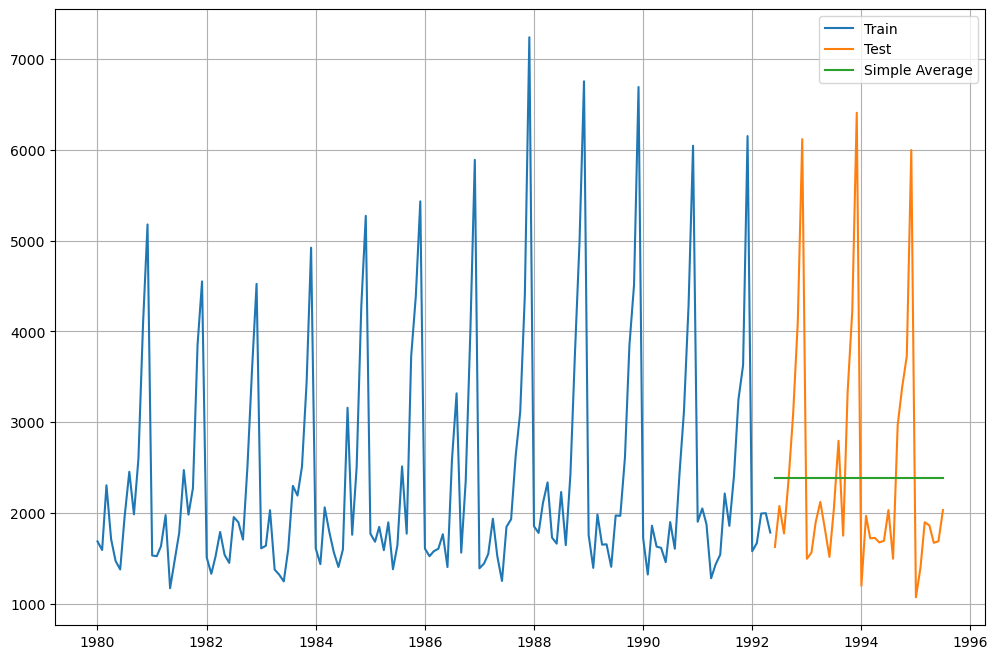

In [37]:
plt.figure(figsize=(12,8))
plt.plot( SimpleAverageTrain['Sparkling'], label='Train')
plt.plot(SimpleAverageTest['Sparkling'], label='Test')
plt.plot(SimpleAverageTest['Sales_Avg'], label='Simple Average')

plt.legend(loc='best')
plt.grid();

In [38]:
rmse_simpleaverage=metrics.mean_squared_error(SimpleAverageTest['Sparkling'],SimpleAverageTest['Sales_Avg'],squared=False)
rmse_simpleaverage

1331.0376366593164

In [39]:
new_row =pd.DataFrame({'Test RMSE': [rmse_simpleaverage]},index=['Simple Average'])
Model_Performance = pd.concat([Model_Performance, new_row])
Model_Performance

,Test RMSE
Linear Regression,1359.708262
Simple Average,1331.037637


Moving Average Model

In [40]:
MovingAverage= df_copy.copy()

In [195]:
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()
MovingAverage['Trailing_3'] = MovingAverage['Sparkling'].rolling(3).mean()

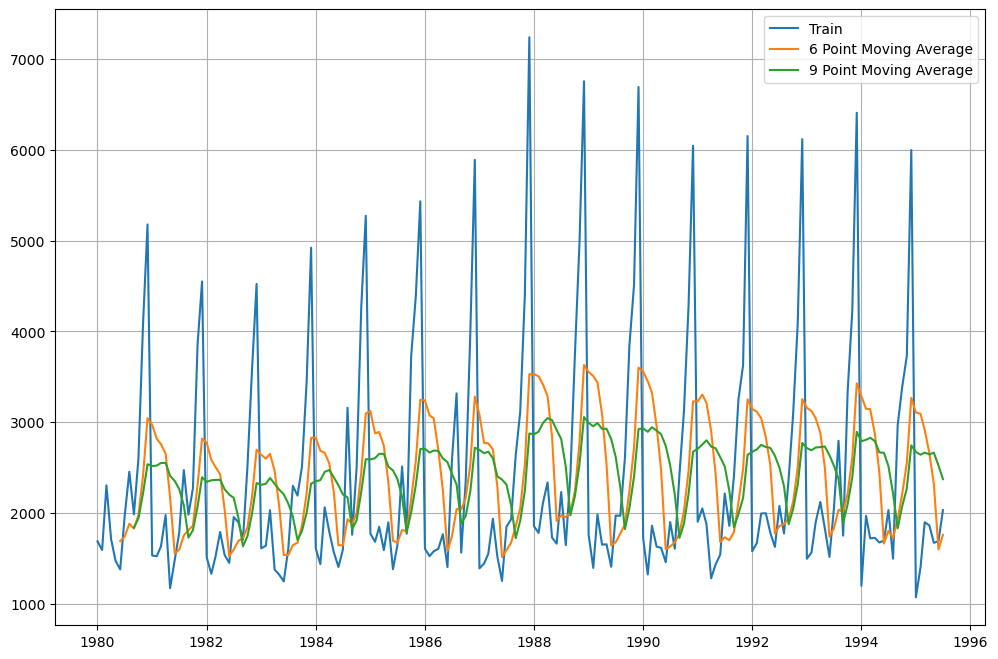

In [42]:
## Plotting on the whole data
plt.figure(figsize=(12,8))
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [199]:
MovingAverage_train= MovingAverage[0:int(len(MovingAverage)*0.8)]
MovingAverage_test= MovingAverage[int(len(MovingAverage)*0.8) :]

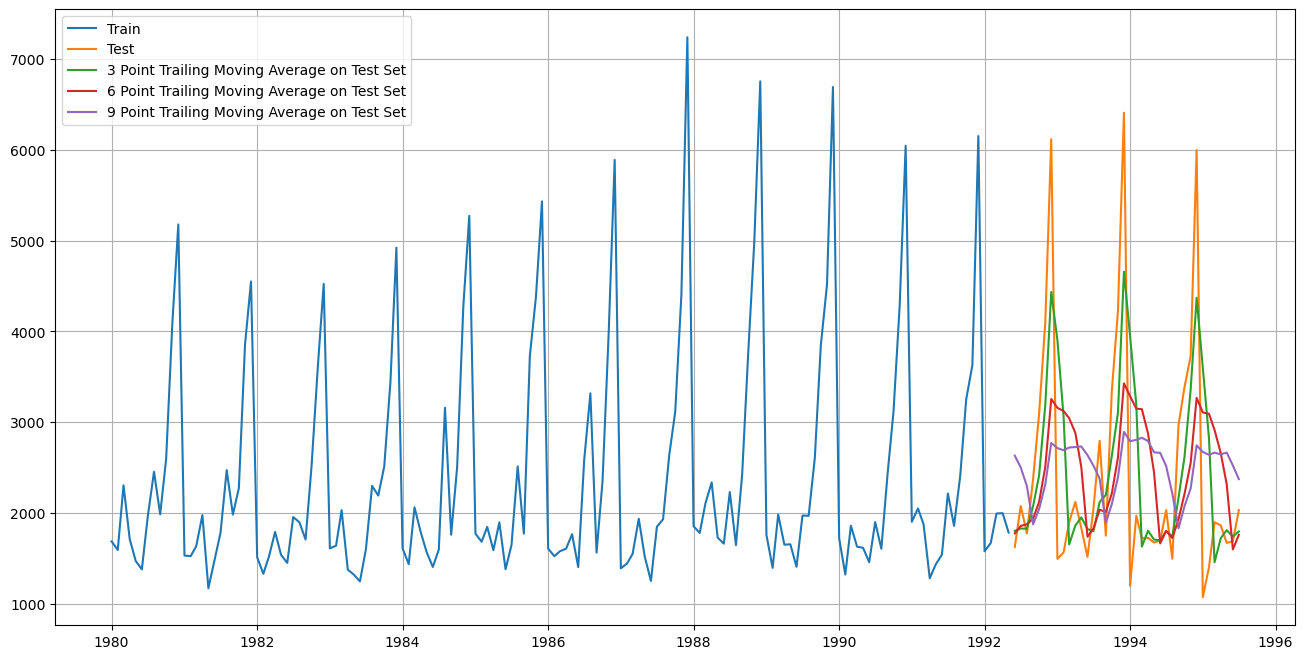

In [201]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage_train['Sparkling'], label='Train')
plt.plot(MovingAverage_test['Sparkling'], label='Test')
plt.plot(MovingAverage_test['Trailing_3'],label = '3 Point Trailing Moving Average on Test Set')
plt.plot(MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

In [207]:
rmse_model4_test_3 = metrics.mean_squared_error(MovingAverage_test['Sparkling'],MovingAverage_test['Trailing_3'],squared=False)
print("For 3 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_3))
      
rmse_model4_test_6 = metrics.mean_squared_error(MovingAverage_test['Sparkling'],MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

rmse_model4_test_9 = metrics.mean_squared_error(MovingAverage_test['Sparkling'],MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

For 3 point Moving Average Model forecast on the Training Data,  RMSE is 1026.533
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1290.625
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1375.582


In [46]:
new_row1 =pd.DataFrame({'Test RMSE': [rmse_model4_test_6]},index=['Moving Average Trailing 6'])
new_row2 =pd.DataFrame({'Test RMSE': [rmse_model4_test_9]},index=['Moving Average Trailing 9'])
Model_Performance = pd.concat([Model_Performance, new_row1, new_row2 ])
Model_Performance

,Test RMSE
Linear Regression,1359.708262
Simple Average,1331.037637
Moving Average Trailing 6,1290.624831
Moving Average Trailing 9,1375.582351


Simple Exponential Smoothing

In [139]:
result= pd.DataFrame({'Alpha':[],'Test RMSE': []})
for i in np.arange(0.01,1,0.01):
    simple=SimpleExpSmoothing(train["Sparkling"])
    simple=simple.fit(smoothing_level=i,optimized=False)
    test[f"SalesPredict_{i}"]=simple.forecast(steps=len(test))
    rmse_simple=metrics.mean_squared_error(test["Sparkling"],test[f"SalesPredict_{i}"],squared=False)
    temp_result = pd.DataFrame({"Alpha": [i], "Test RMSE": [rmse_simple]})
    
    # Concatenate the temporary result with the main result DataFrame
    result = pd.concat([result, temp_result], ignore_index=True)

In [141]:
result.sort_values(by="Test RMSE",ascending=True)

,Alpha,Test RMSE
1,0.02,1279.495201
0,0.01,1281.032699
2,0.03,1293.110073
3,0.04,1305.462953
4,0.05,1316.411742
...,...,...
94,0.95,3778.432623
95,0.96,3796.048620
96,0.97,3813.437370
97,0.98,3830.602869


In [171]:
simple=SimpleExpSmoothing(train["Sparkling"])
simple=simple.fit(smoothing_level=0.02,optimized=False)
test["Predicted_Sales"]=simple.forecast(steps=len(test))

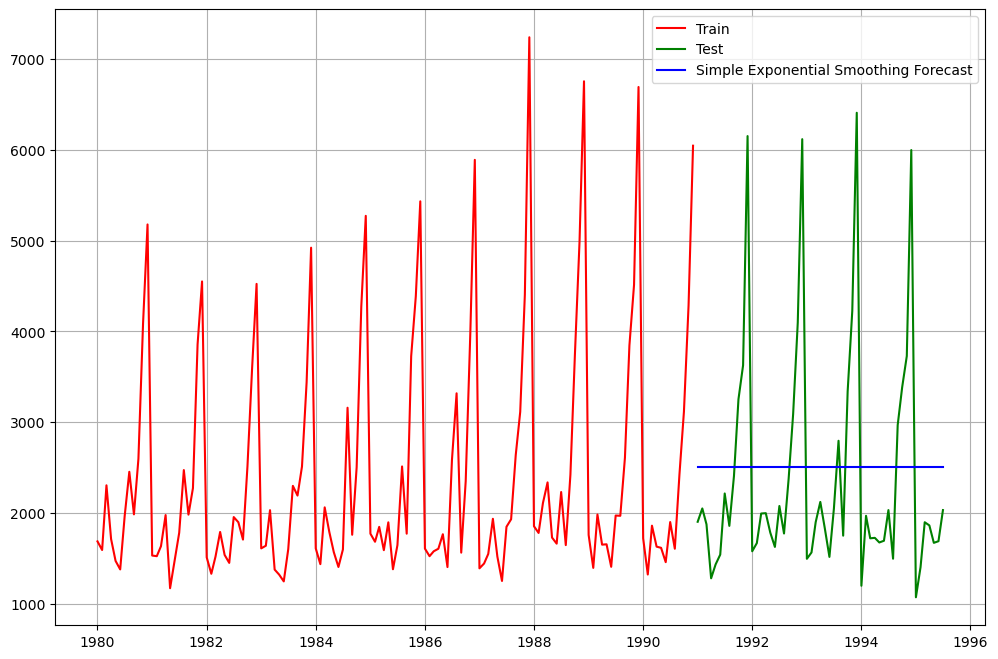

In [173]:
plt.figure(figsize=(12,8))
plt.plot(train["Sparkling"], color="Red", label="Train")
plt.plot(test["Sparkling"], color="Green", label="Test")
plt.plot(test["Predicted_Sales"], color="Blue", label="Simple Exponential Smoothing Forecast")
plt.legend(loc = 'best')
plt.grid();

In [147]:
new_row6 =pd.DataFrame({'Test RMSE': [result["Test RMSE"].sort_values(ascending=True).iloc[0]]},index=['Simple Exponential Smoothing'])
Model_Performance = pd.concat([Model_Performance, new_row6])
Model_Performance

,Test RMSE
Linear Regression,1359.708262
Simple Average,1331.037637
Moving Average Trailing 6,1290.624831
Moving Average Trailing 9,1375.582351
Triple Exponential Smoothing,1329.656653
"ARIMA(2,1,2)",1299.980272
"SARIMA(1,1,2)(1,0,2,12)",528.584118
Simple Exponential Smoothing,1324.696535
Simple Exponential Smoothing,1279.495201


In [167]:
result1= pd.DataFrame({'Alpha':[],'Beta':[],'Test RMSE': []})
for i in np.arange(0.01,1,0.01):
    for j in np.arange(0.01,1,0.01):
         double=Holt(train["Sparkling"])
         double=double.fit(smoothing_level=i,smoothing_trend=j,optimized=False)
         test[f"Predict_{i}{j}"]=double.forecast(steps=len(test))
         rmse_double=metrics.mean_squared_error(test["Sparkling"],test[f"Predict_{i}{j}"],squared=False)
         temp_result = pd.DataFrame({"Alpha": [i], "Beta" : [j], "Test RMSE": [rmse_double]})
    
    # Concatenate the temporary result with the main result DataFrame
         result1 = pd.concat([result1, temp_result], ignore_index=True) 

In [169]:
result1.sort_values(by="Test RMSE",ascending=True)

,Alpha,Beta,Test RMSE
148,0.02,0.50,1274.630824
115,0.02,0.17,1275.105310
254,0.03,0.57,1276.025836
255,0.03,0.58,1278.425944
253,0.03,0.56,1278.585750
...,...,...,...
2175,0.22,0.97,60335.137153
2077,0.21,0.98,60589.909084
2176,0.22,0.98,60740.944412
2177,0.22,0.99,61104.414936


In [175]:
double=Holt(train["Sparkling"])
double=double.fit(smoothing_level=0.02,smoothing_trend=0.5,optimized=False)
test["PredictedSales_double"]=double.forecast(steps=len(test))

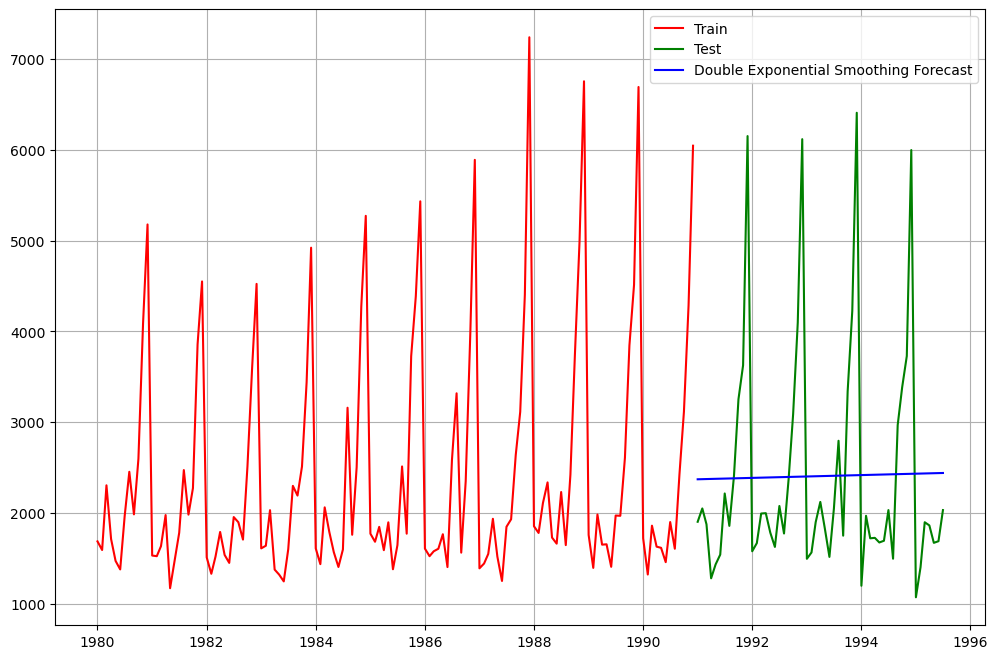

In [183]:
plt.figure(figsize=(12,8))
plt.plot(train["Sparkling"], color="Red", label="Train")
plt.plot(test["Sparkling"], color="Green", label="Test")
plt.plot(test["PredictedSales_double"], color="Blue", label="Double Exponential Smoothing Forecast")
plt.legend(loc = 'best')
plt.grid();

In [179]:
new_row7 =pd.DataFrame({'Test RMSE': [result1["Test RMSE"].sort_values(ascending=True).iloc[0]]},index=['Double Exponential Smoothing'])
Model_Performance = pd.concat([Model_Performance, new_row7])
Model_Performance

,Test RMSE
Linear Regression,1359.708262
Simple Average,1331.037637
Moving Average Trailing 6,1290.624831
Moving Average Trailing 9,1375.582351
Triple Exponential Smoothing,1329.656653
"ARIMA(2,1,2)",1299.980272
"SARIMA(1,1,2)(1,0,2,12)",528.584118
Simple Exponential Smoothing,1324.696535
Simple Exponential Smoothing,1279.495201
Double Exponential Smoothing,1274.630824


In [209]:
result2= pd.DataFrame({'Alpha':[], 'Beta':[],'Gamma':[],'Test RMSE': []})
for i in np.arange(0.01,1,0.1):
    for j in np.arange(0.01,1,0.1):
        for k in np.arange(0.01,1,0.1):
             triple=ExponentialSmoothing(train["Sparkling"])
             triple=triple.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False)
             test[f"Predict_{i}{j}{k}"]=triple.forecast(steps=len(test))
             rmse_triple=metrics.mean_squared_error(test["Sparkling"],test[f"Predict_{i}{j}{k}"],squared=False)
             temp_result = pd.DataFrame({"Alpha": [i], "Beta" : [j], "Gamma": [k],"Test RMSE": [rmse_triple]})
    
    # Concatenate the temporary result with the main result DataFrame
             result2 = pd.concat([result2, temp_result], ignore_index=True)

In [211]:
result2.sort_values(by="Test RMSE",ascending=True)

,Alpha,Beta,Gamma,Test RMSE
0,0.01,0.01,0.01,1286.648058
72,0.01,0.71,0.21,1286.648058
71,0.01,0.71,0.11,1286.648058
70,0.01,0.71,0.01,1286.648058
69,0.01,0.61,0.91,1286.648058
...,...,...,...,...
927,0.91,0.21,0.71,3705.611326
926,0.91,0.21,0.61,3705.611326
925,0.91,0.21,0.51,3705.611326
935,0.91,0.31,0.51,3705.611326


In [213]:
triple=ExponentialSmoothing(train["Sparkling"],seasonal="additive")
triple=triple.fit(smoothing_level=0.01,smoothing_trend=0.01,smoothing_seasonal=0.01,optimized=True)
test["PredictedSales_triple"]=triple.forecast(steps=len(test))

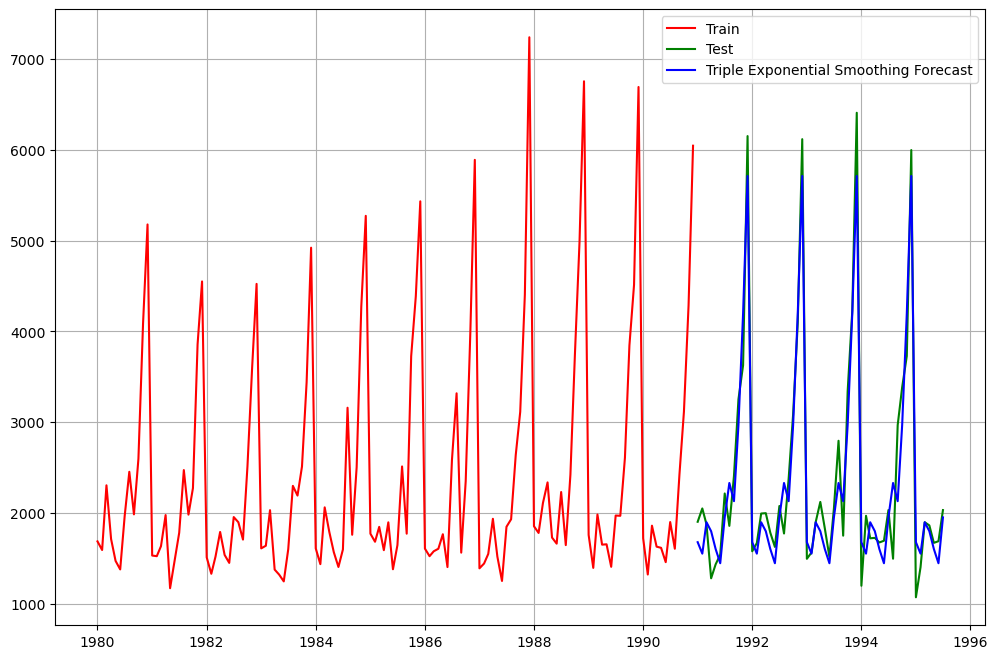

In [215]:
plt.figure(figsize=(12,8))
plt.plot(train["Sparkling"], color="Red", label="Train")
plt.plot(test["Sparkling"], color="Green", label="Test")
plt.plot(test["PredictedSales_triple"], color="Blue", label="Triple Exponential Smoothing Forecast")
plt.legend(loc = 'best')
plt.grid();

In [217]:
new_row5 =pd.DataFrame({'Test RMSE': [result2["Test RMSE"].sort_values(ascending=True).iloc[0]]},index=['Triple Exponential Smoothing'])
Model_Performance = pd.concat([Model_Performance, new_row5])
Model_Performance

,Test RMSE
Linear Regression,1359.708262
Simple Average,1331.037637
Moving Average Trailing 6,1290.624831
Moving Average Trailing 9,1375.582351
Triple Exponential Smoothing,1329.656653
"ARIMA(2,1,2)",1299.980272
"SARIMA(1,1,2)(1,0,2,12)",528.584118
Simple Exponential Smoothing,1324.696535
Simple Exponential Smoothing,1279.495201
Double Exponential Smoothing,1274.630824


Check for Stationarity in the data set

In [69]:
dftest = adfuller(df_copy["Sparkling"])#python implementation of dicky fuller test 
dftest
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])

DF test statistic is -1.360
DF test p-value is 0.6011


As p value is greater than 0.05, we fail to reject Null Hypothesis which is The data set is non-stationary

Text(0, 0.5, 'Sales')

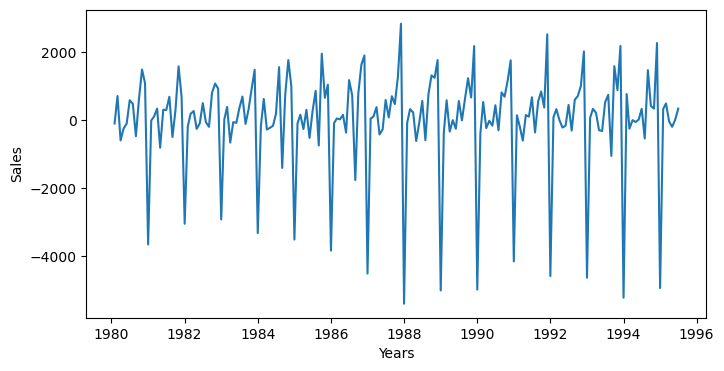

In [71]:
plt.figure(figsize=(8, 4))
plt.plot(df_copy["Sparkling"].diff(periods=1))
plt.xlabel('Years')
plt.ylabel('Sales')

In [73]:
dftest_diff = adfuller(df_copy["Sparkling"].diff(periods=1).dropna())#python implementation of dicky fuller test 
dftest_diff
print('DF test statistic is %3.3f' %dftest_diff[0])
print('DF test p-value is %1.4f' %dftest_diff[1])

DF test statistic is -45.050
DF test p-value is 0.0000


When we take the difference of sales and perform adfuller test, we get p-value less than 0.05 which ensures data has become stationary.

ACF and PACF plot

In [79]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

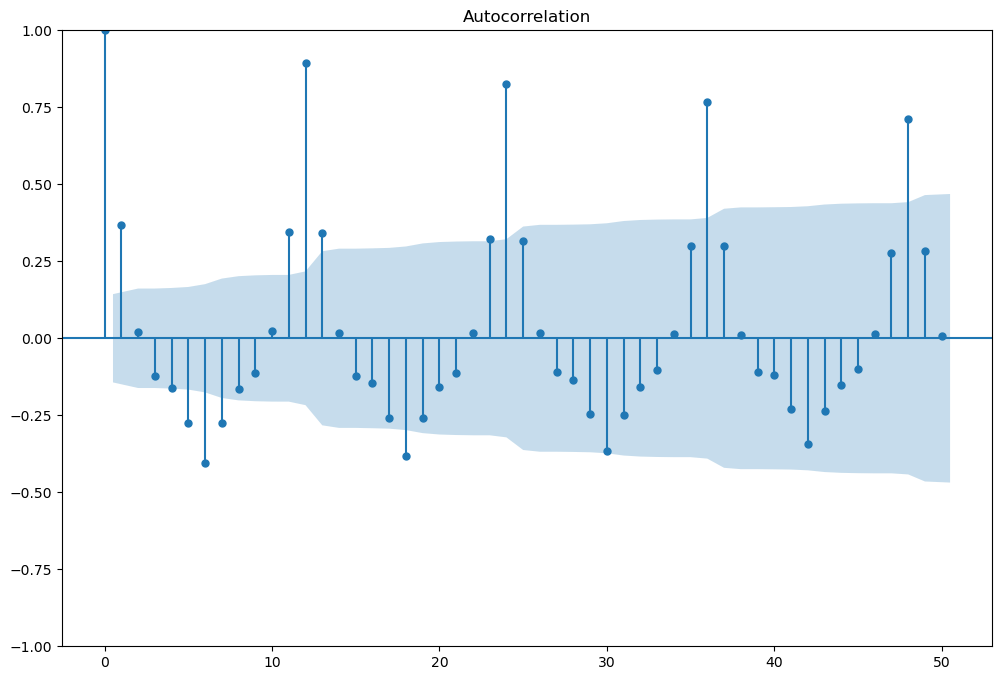

In [81]:
plt.figure(figsize=(12,8))
plot_acf(df_copy["Sparkling"],lags=50,  ax=plt.gca())
plt.show()

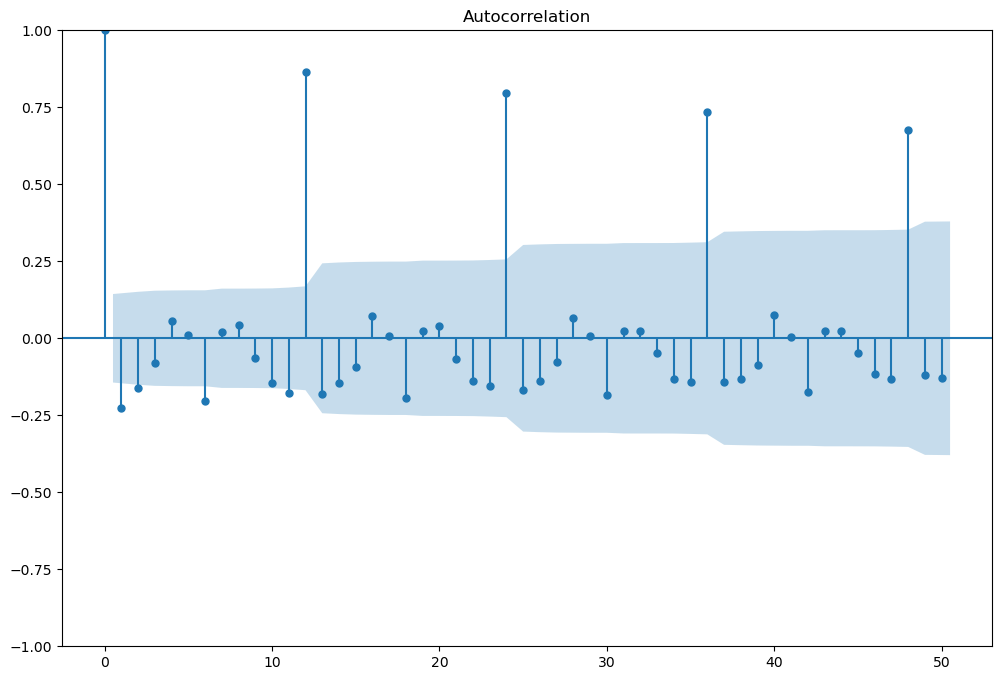

In [85]:
plt.figure(figsize=(12,8))
plot_acf(df_copy["Sparkling"].diff(1).dropna(),lags=50,  ax=plt.gca())
plt.show()

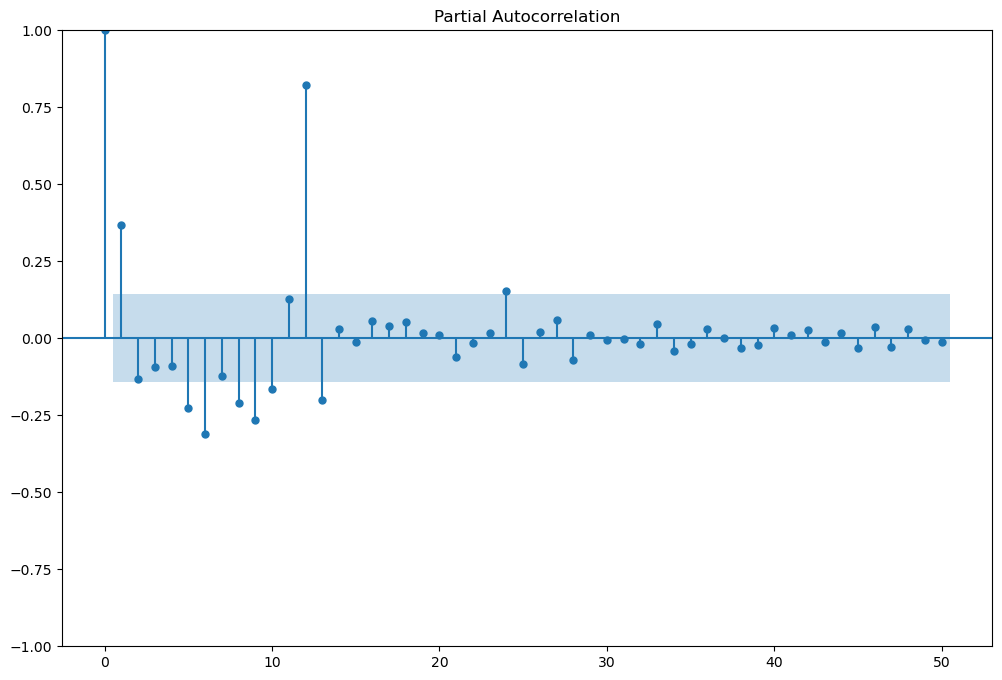

In [219]:
plt.figure(figsize=(12,8))
plot_pacf(df_copy["Sparkling"],lags=50,  ax=plt.gca())
plt.show()

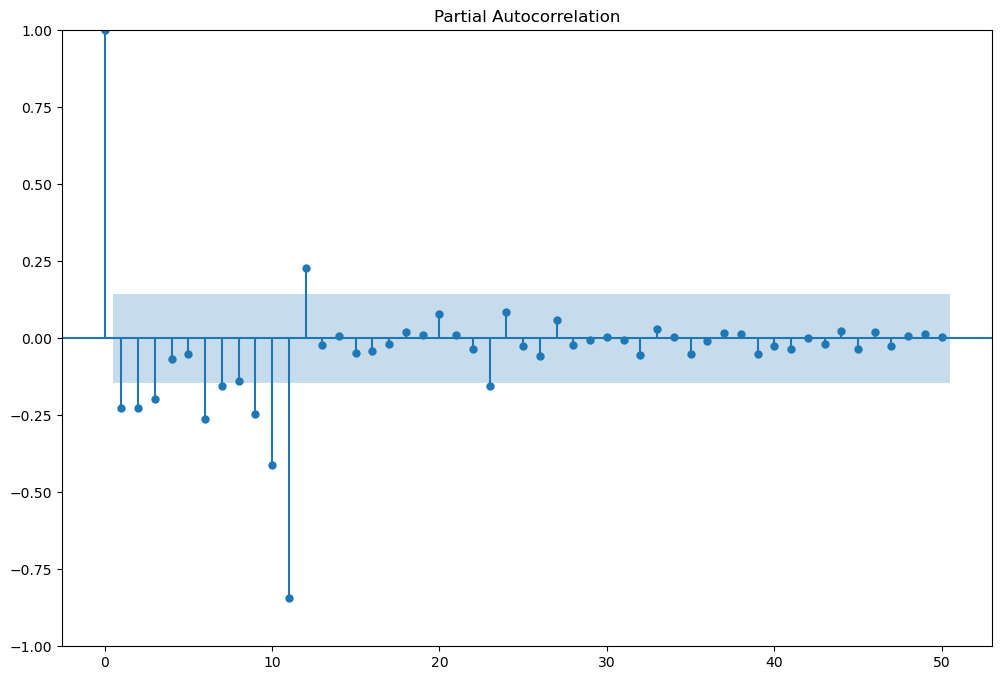

In [221]:
plt.figure(figsize=(12,8))
plot_pacf(df_copy["Sparkling"].diff(1).dropna(),lags=50,  ax=plt.gca())
plt.show()

ARIMA Model

In [87]:
train=df_copy[df_copy['Year'] <1991]
test=df_copy[df_copy['Year'] >=1991]

In [89]:
train.shape

(132, 3)

In [91]:
test.shape

(55, 3)

Manual ARIMA

In [223]:
manual_ARIMA = ARIMA(train['Sparkling'], order=(3,1,2),freq='MS')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -1109.388
Date:                Sun, 15 Sep 2024   AIC                           2230.776
Time:                        10:26:51   BIC                           2248.027
Sample:                    01-01-1980   HQIC                          2237.786
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4303      0.044     -9.716      0.000      -0.517      -0.344
ar.L2          0.3283      0.114      2.889      0.004       0.106       0.551
ar.L3         -0.2414      0.069     -3.480      0.0

In [225]:
test["predicted_manual_ARIMA"] = results_manual_ARIMA.forecast(steps=len(test))

In [239]:
Model_Performance_Stationary=pd.DataFrame(columns=["Test RMSE"])

In [241]:
rmse_manual_arima = metrics.mean_squared_error(test['Sparkling'],test["predicted_manual_ARIMA"],squared=False)
new_model1 = pd.DataFrame({'Test RMSE': [rmse_manual_arima]}
                           ,index=['Manual ARIMA(3,1,2)'])


Model_Performance_Stationary = pd.concat([Model_Performance_Stationary,new_model1])
Model_Performance_Stationary

,Test RMSE
"Manual ARIMA(3,1,2)",1286.206523


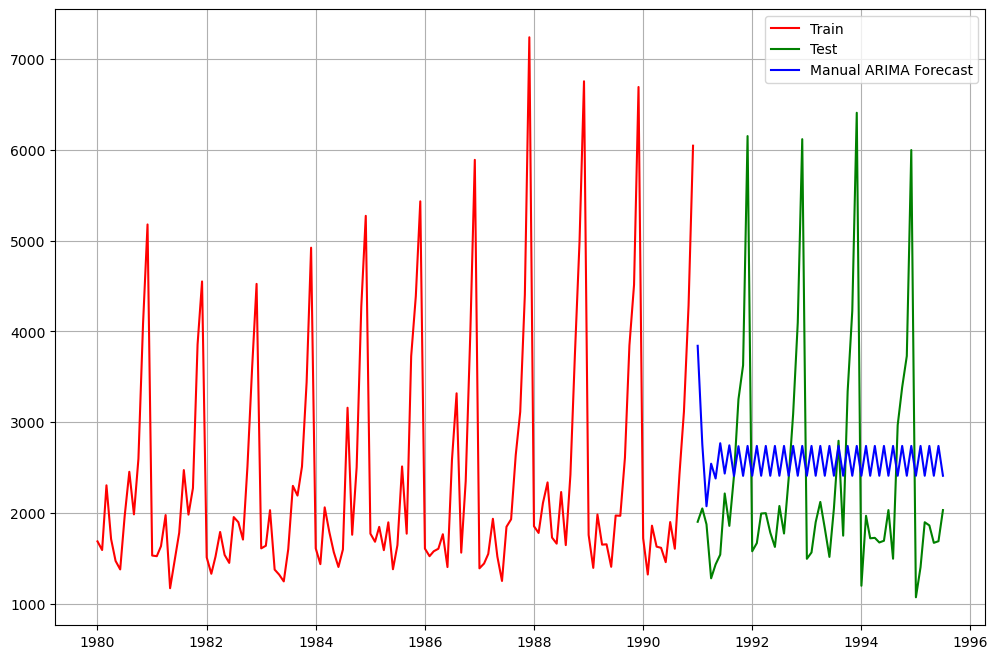

In [245]:
plt.figure(figsize=(12,8))
plt.plot(train["Sparkling"], color="Red", label="Train")
plt.plot(test["Sparkling"], color="Green", label="Test")
plt.plot(test["predicted_manual_ARIMA"], color="Blue", label="Manual ARIMA Forecast")
plt.legend(loc="best")
plt.grid()

Auto ARIMA

In [247]:
import itertools
p = q = range(0, 5)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (0, 1, 4)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (1, 1, 4)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (2, 1, 4)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)
Model: (3, 1, 4)
Model: (4, 1, 0)
Model: (4, 1, 1)
Model: (4, 1, 2)
Model: (4, 1, 3)
Model: (4, 1, 4)


In [249]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
print(ARIMA_AIC)

Empty DataFrame
Columns: [param, AIC]
Index: []


In [251]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC.loc[len(ARIMA_AIC)] = {'param':param, 'AIC': ARIMA_model.aic}

ARIMA(0, 1, 0) - AIC:2267.6630357855465
ARIMA(0, 1, 1) - AIC:2263.0600155918555
ARIMA(0, 1, 2) - AIC:2234.4083231291497
ARIMA(0, 1, 3) - AIC:2233.994857739982
ARIMA(0, 1, 4) - AIC:2235.1737364706064
ARIMA(1, 1, 0) - AIC:2266.6085393190097
ARIMA(1, 1, 1) - AIC:2235.7550946734245
ARIMA(1, 1, 2) - AIC:2234.5272004520966
ARIMA(1, 1, 3) - AIC:2235.607813273727
ARIMA(1, 1, 4) - AIC:2227.7369766914435
ARIMA(2, 1, 0) - AIC:2260.365743968097
ARIMA(2, 1, 1) - AIC:2233.777626299803
ARIMA(2, 1, 2) - AIC:2213.5092124179537
ARIMA(2, 1, 3) - AIC:2232.915097876781
ARIMA(2, 1, 4) - AIC:2222.921832418164
ARIMA(3, 1, 0) - AIC:2257.72337899794
ARIMA(3, 1, 1) - AIC:2235.5001880892823
ARIMA(3, 1, 2) - AIC:2230.7760106772266
ARIMA(3, 1, 3) - AIC:2221.4556694788344
ARIMA(3, 1, 4) - AIC:2219.961201440492
ARIMA(4, 1, 0) - AIC:2259.741841399271
ARIMA(4, 1, 1) - AIC:2237.0730412685652
ARIMA(4, 1, 2) - AIC:2233.0495460067327
ARIMA(4, 1, 3) - AIC:2222.904099804451
ARIMA(4, 1, 4) - AIC:2213.497878449174


In [253]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
24,"(4, 1, 4)",2213.497878
12,"(2, 1, 2)",2213.509212
19,"(3, 1, 4)",2219.961201
18,"(3, 1, 3)",2221.455669
23,"(4, 1, 3)",2222.904100
14,"(2, 1, 4)",2222.921832
9,"(1, 1, 4)",2227.736977
17,"(3, 1, 2)",2230.776011
13,"(2, 1, 3)",2232.915098
22,"(4, 1, 2)",2233.049546


In [255]:
auto_ARIMA = ARIMA(train['Sparkling'], order=(4,1,4),freq='MS')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(4, 1, 4)   Log Likelihood               -1097.749
Date:                Sun, 15 Sep 2024   AIC                           2213.498
Time:                        11:23:49   BIC                           2239.375
Sample:                    01-01-1980   HQIC                          2224.013
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4828      0.128     -3.773      0.000      -0.734      -0.232
ar.L2         -0.4847      0.075     -6.441      0.000      -0.632      -0.337
ar.L3         -0.4822      0.108     -4.454      0.0

In [257]:
test["predicted_auto_ARIMA"] = results_auto_ARIMA.forecast(steps=len(test))

In [259]:
rmse_auto_arima = metrics.mean_squared_error(test['Sparkling'],test["predicted_auto_ARIMA"],squared=False)
new_model2 = pd.DataFrame({'Test RMSE': [rmse_auto_arima]}
                           ,index=['ARIMA(4,1,4)'])


Model_Performance_Stationary = pd.concat([Model_Performance_Stationary,new_model2])
Model_Performance_Stationary

,Test RMSE
"Manual ARIMA(3,1,2)",1286.206523
"ARIMA(4,1,4)",1204.838347


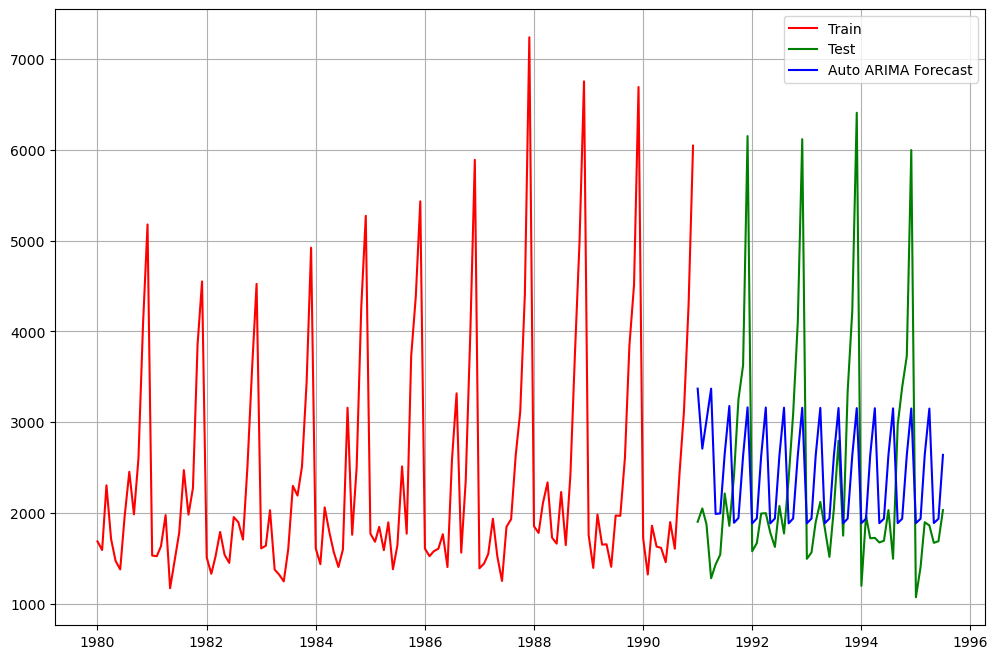

In [261]:
plt.figure(figsize=(12,8))
plt.plot(train["Sparkling"], color="Red", label="Train")
plt.plot(test["Sparkling"], color="Green", label="Test")
plt.plot(test["predicted_auto_ARIMA"], color="Blue", label="Auto ARIMA Forecast")
plt.legend(loc="best")
plt.grid()

Manual SARIMA

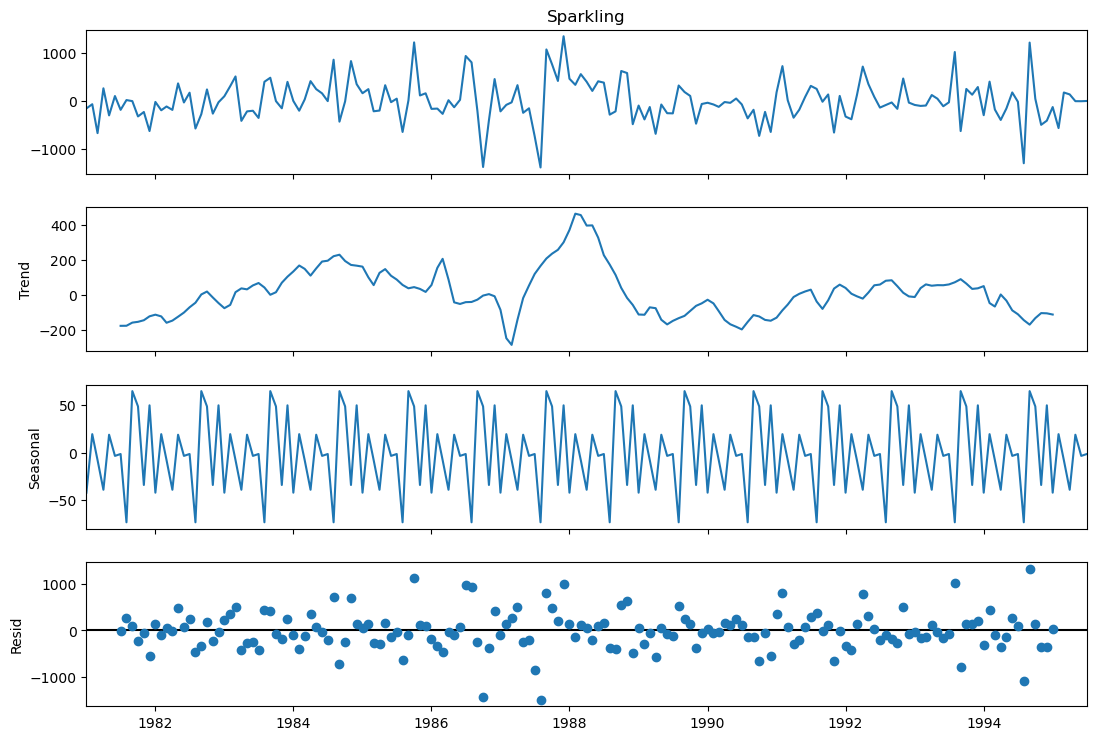

In [265]:
decompose=sm.tsa.seasonal_decompose(df_copy["Sparkling"].diff(12).dropna(), model="additive")
fig=decompose.plot()
fig.set_figwidth(12)
fig.set_figheight(8)

Check stationarity of seasoned data

In [267]:
dftest_diff = adfuller(df_copy["Sparkling"].diff(periods=12).dropna())#python implementation of dicky fuller test 
dftest_diff
print('DF test statistic is %3.3f' %dftest_diff[0])
print('DF test p-value is %1.4f' %dftest_diff[1])

DF test statistic is -4.460
DF test p-value is 0.0002


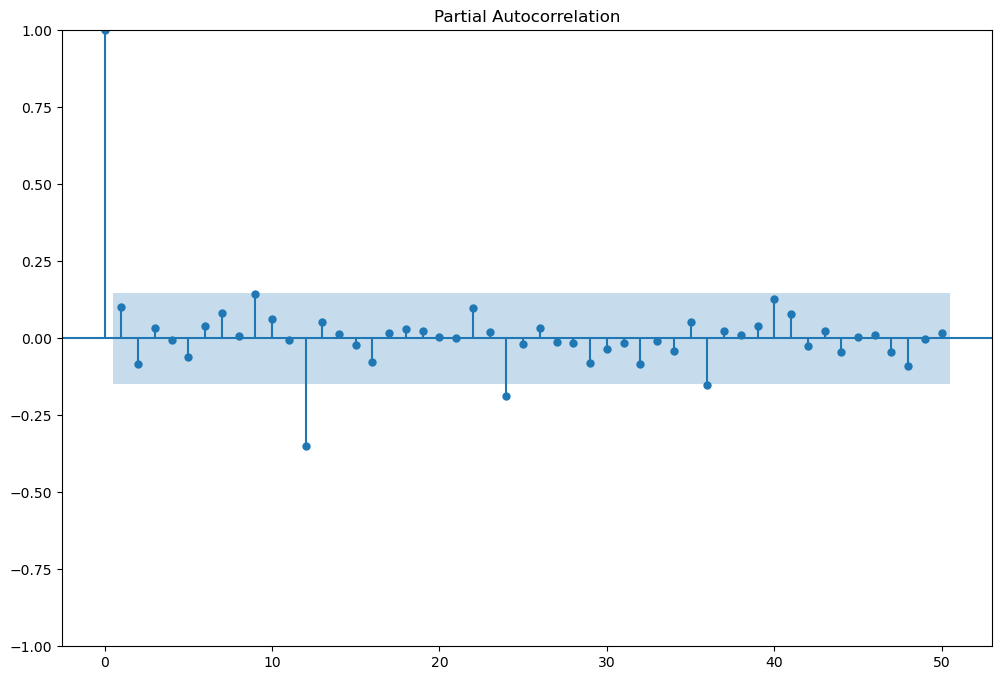

In [269]:
plt.figure(figsize=(12,8))
plot_pacf(df_copy["Sparkling"].diff(12).dropna(),lags=50,  ax=plt.gca())
plt.show()

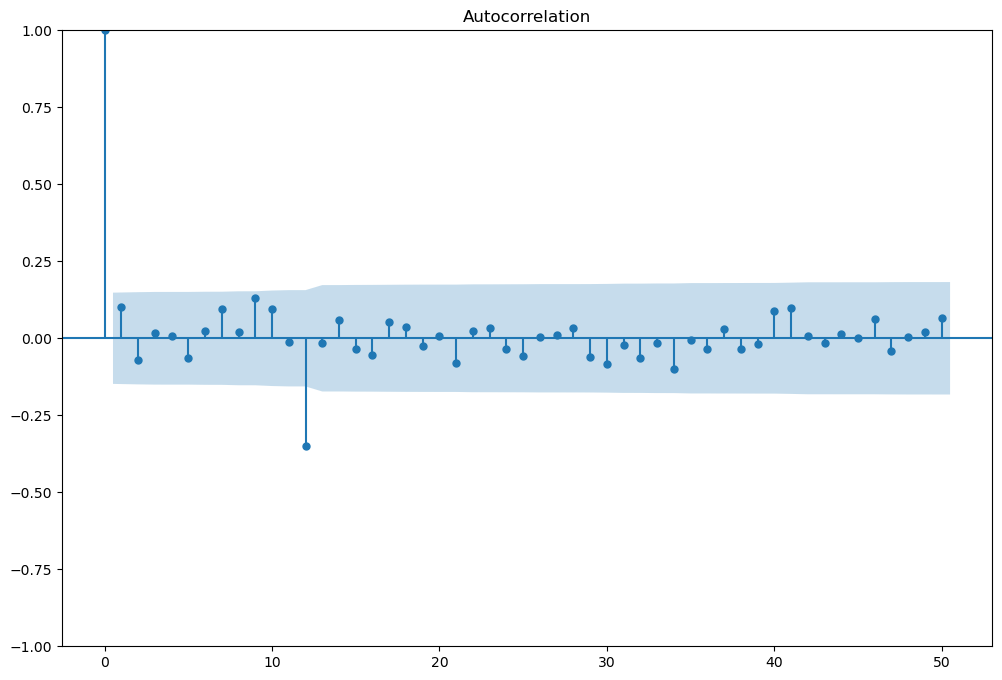

In [271]:
plt.figure(figsize=(12,8))
plot_acf(df_copy["Sparkling"].diff(12).dropna(),lags=50,  ax=plt.gca())
plt.show()

In [275]:
import statsmodels.api as sm

manual_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(3, 1, 2),
                                seasonal_order=(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_12 = manual_SARIMA_12.fit(maxiter=1000)
print(results_manual_SARIMA_12.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  132
Model:             SARIMAX(3, 1, 2)x(1, 0, [1], 12)   Log Likelihood                -855.683
Date:                              Sun, 15 Sep 2024   AIC                           1727.365
Time:                                      12:10:12   BIC                           1749.394
Sample:                                           0   HQIC                          1736.307
                                              - 132                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6468      0.291     -2.221      0.026      -1.218      -0.076
ar.L2         -0.05

In [277]:
test["predicted_manual_SARIMA_12"]=results_manual_SARIMA_12.forecast(steps=len(test))

In [279]:
rmse_manual_sarima = metrics.mean_squared_error(test['Sparkling'],test["predicted_manual_SARIMA_12"],squared=False)
new_model3 = pd.DataFrame({'Test RMSE': [rmse_manual_sarima]}
                           ,index=['Manual SARIMA(3,1,2)(1,0,1,12)'])


Model_Performance_Stationary = pd.concat([Model_Performance_Stationary,new_model3])
Model_Performance_Stationary

,Test RMSE
"Manual ARIMA(3,1,2)",1286.206523
"ARIMA(4,1,4)",1204.838347
"Manual SARIMA(3,1,2)(1,0,1,12)",613.152364


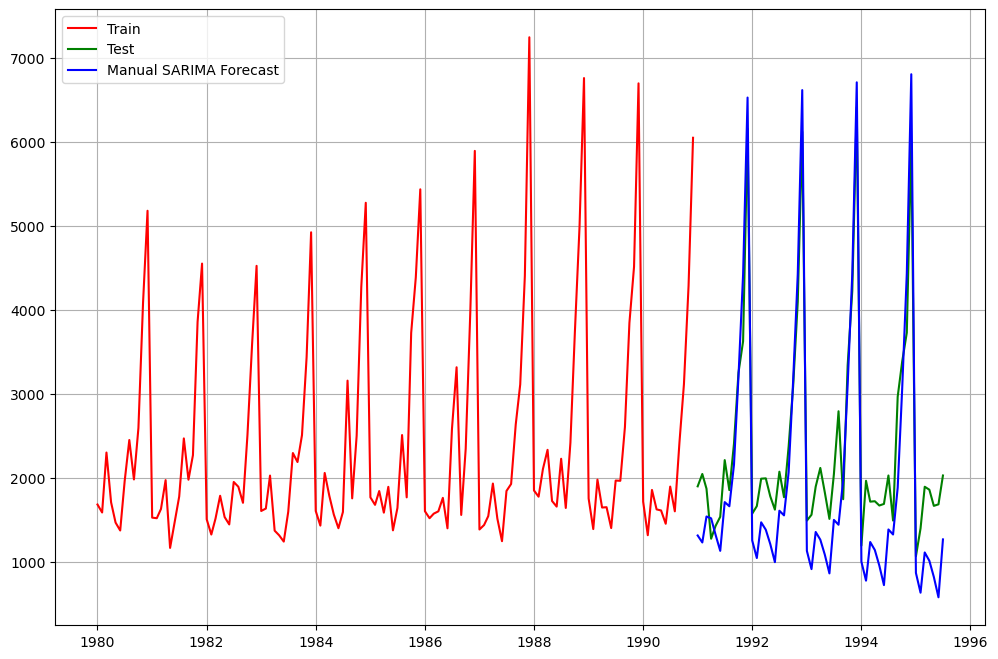

In [281]:
plt.figure(figsize=(12,8))
plt.plot(train["Sparkling"], color="Red", label="Train")
plt.plot(test["Sparkling"], color="Green", label="Test")
plt.plot(test["predicted_manual_SARIMA_12"], color="Blue", label="Manual SARIMA Forecast")
plt.legend(loc="best")
plt.grid()

Auto SARIMA

In [283]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [285]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [287]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC.loc[len(SARIMA_AIC)] = {'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.2614616845315
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.1533640234386
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.436602245668
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.9905301389144
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.2108735791617
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470858
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.2054158611422
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.9898053920879
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.1629078505816
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.7688649566337
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1692.7089572724688
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1797.1795881838225
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1738.0903193753695
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1570.1509144508307
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1605.6751954175318
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.224508393007
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1570.401882415187
SARIMA(0, 1, 

In [289]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
50,"(1, 1, 2)","(1, 0, 2, 12)",1555.584247
53,"(1, 1, 2)","(2, 0, 2, 12)",1555.934563
26,"(0, 1, 2)","(2, 0, 2, 12)",1557.121565
23,"(0, 1, 2)","(1, 0, 2, 12)",1557.160507
77,"(2, 1, 2)","(1, 0, 2, 12)",1557.340402


In [291]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -770.792
Date:                            Sun, 15 Sep 2024   AIC                           1555.584
Time:                                    12:27:39   BIC                           1574.095
Sample:                                         0   HQIC                          1563.083
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6281      0.255     -2.463      0.014      -1.128      -0.128
ma.L1         -0.1041      0.225   

In [293]:
test["predicted_auto_SARIMA_12"]=results_auto_SARIMA_12.forecast(steps=len(test))

In [295]:
rmse_auto_sarima = metrics.mean_squared_error(test['Sparkling'],test["predicted_auto_SARIMA_12"],squared=False)
new_model4 = pd.DataFrame({'Test RMSE': [rmse_auto_sarima]}
                           ,index=['SARIMA(1,1,2)(1,0,2,12)'])


Model_Performance_Stationary = pd.concat([Model_Performance_Stationary,new_model4])
Model_Performance_Stationary

,Test RMSE
"Manual ARIMA(3,1,2)",1286.206523
"ARIMA(4,1,4)",1204.838347
"Manual SARIMA(3,1,2)(1,0,1,12)",613.152364
"SARIMA(1,1,2)(1,0,2,12)",528.584118


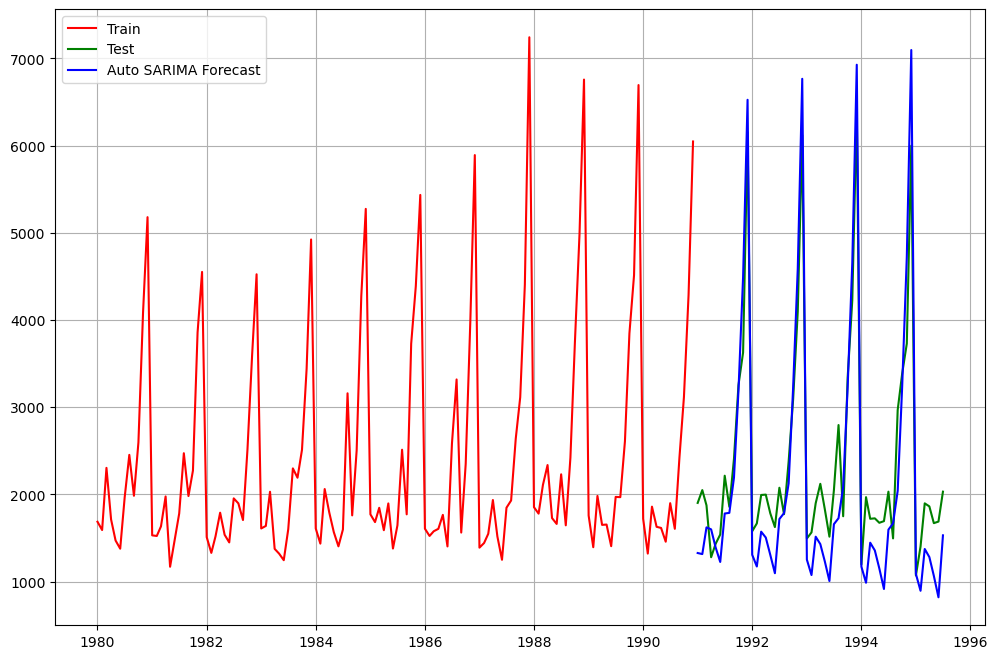

In [297]:
plt.figure(figsize=(12,8))
plt.plot(train["Sparkling"], color="Red", label="Train")
plt.plot(test["Sparkling"], color="Green", label="Test")
plt.plot(test["predicted_auto_SARIMA_12"], color="Blue", label="Auto SARIMA Forecast")
plt.legend(loc="best")
plt.grid()

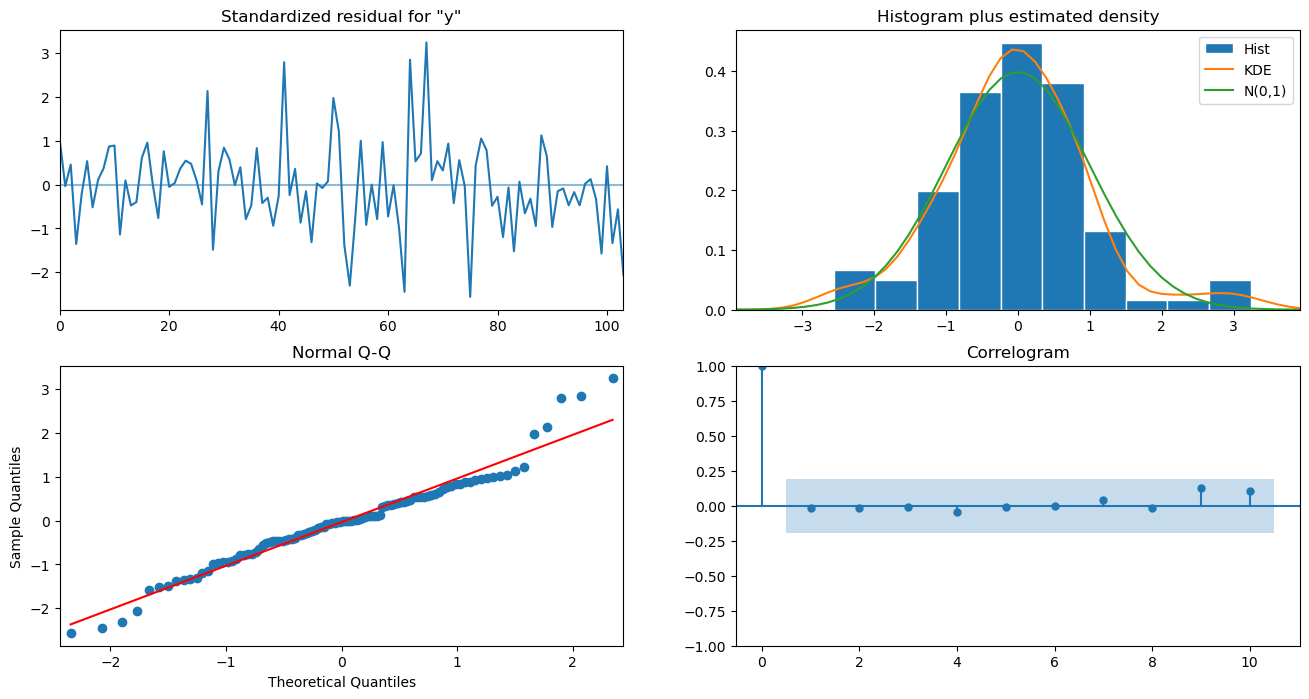

In [305]:
results_auto_SARIMA_12.plot_diagnostics(figsize=(16, 8))
plt.show()

In [307]:
full_data_model = sm.tsa.statespace.SARIMAX(df_copy['Sparkling'],
                                order=(1,1,2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  187
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood               -1173.413
Date:                            Sun, 15 Sep 2024   AIC                           2360.827
Time:                                    15:27:06   BIC                           2382.309
Sample:                                01-01-1980   HQIC                          2369.551
                                     - 07-01-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6609      0.242     -2.732      0.006      -1.135      -0.187
ma.L1         -0.2740      0.200   

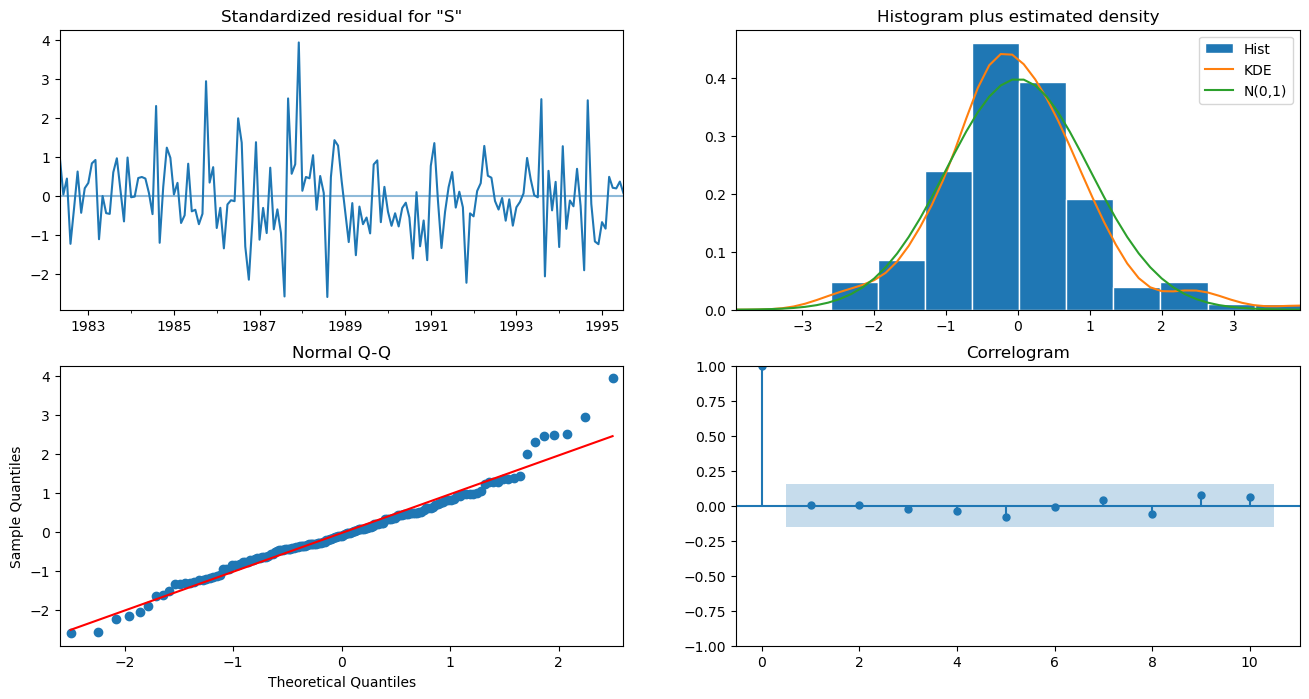

In [311]:
results_full_data_model.plot_diagnostics(figsize=(16, 8));

In [315]:
predicted_SARIMA_12_full_data = results_full_data_model.get_forecast(steps=12)

In [319]:
predicted_SARIMA_12_full_data.summary_frame(alpha=0.05).head()

Sparkling,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-01,1836.377934,379.702232,1092.175234,2580.580634
1995-09-01,2489.573090,384.466572,1736.032455,3243.113725
1995-10-01,3324.576401,384.572277,2570.828589,4078.324214
1995-11-01,4020.221876,386.330167,3263.028662,4777.415090
1995-12-01,6289.986888,386.384809,5532.686578,7047.287199


In [321]:
rmse = metrics.mean_squared_error(df_copy['Sparkling'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 539.9791516585447


In [331]:
pred_full_manual_SARIMA_date = predicted_SARIMA_12_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-01',end='1996-07-01', freq='MS'))
pred_full_manual_SARIMA_date

Sparkling,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-01,1836.377934,379.702232,1092.175234,2580.580634
1995-09-01,2489.573090,384.466572,1736.032455,3243.113725
1995-10-01,3324.576401,384.572277,2570.828589,4078.324214
1995-11-01,4020.221876,386.330167,3263.028662,4777.415090
1995-12-01,6289.986888,386.384809,5532.686578,7047.287199
1996-01-01,1244.689638,387.294980,485.605425,2003.773851
1996-02-01,1533.155476,387.523494,773.623386,2292.687567
1996-03-01,1821.699301,388.150436,1060.938426,2582.460177
1996-04-01,1788.492563,388.490622,1027.064936,2549.920190
1996-05-01,1627.570071,389.009697,865.125075,2390.015067


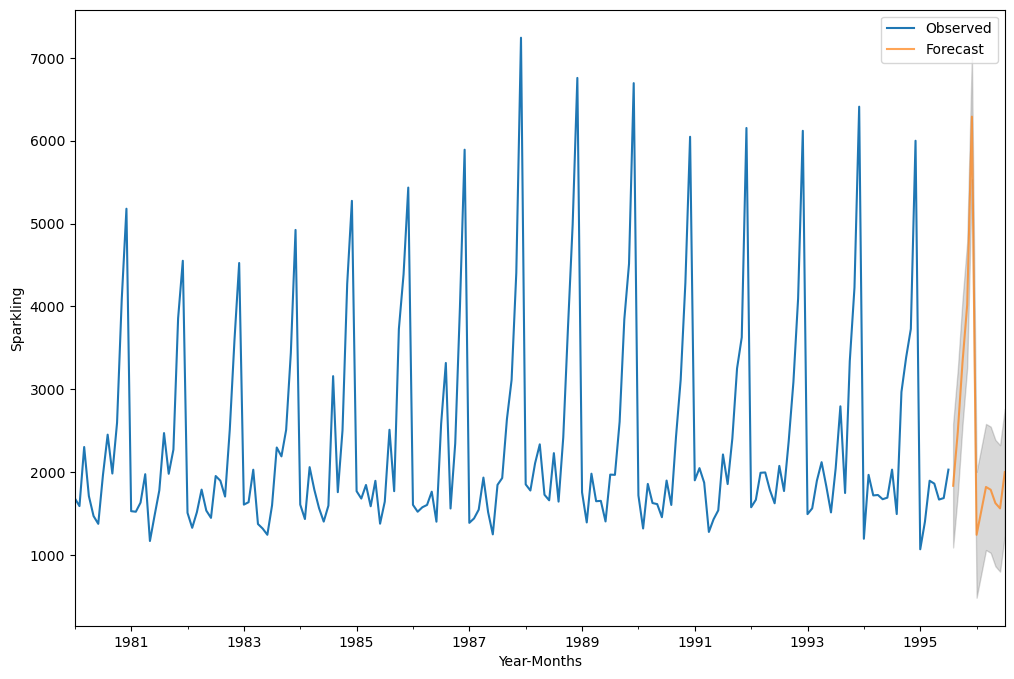

In [329]:
# plot the forecast along with the confidence band
plt.figure(figsize=(12,8))
axis = df_copy['Sparkling'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.show()